# 1. Optimization problem

## 1.1. Problem statement
Optimization is the problem of finding minimum or maximum of a function.

## 1.2. First-derivative test

## 1.3. Second-derivative test

# 2. Gradient Descent
In real life, especially when the gradient gets very complicated or is very large, mathematical methods on solving for global minimum are shown to be impossible. There are a number of computational methods have been developed in order to find extrema of a function, where [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) (GD) is one of the most pupular and is widely used in Machine Learning. This is an iterative method trying to minimize a [differentiable](https://en.wikipedia.org/wiki/Differentiable_function) function, $f(\mathbf{x})$. In the context of Machine Learning, the function to be minimized is nothing but the loss function, $L(\theta)$, where $\theta$ represents model parameters.

There is a drawback of GD is that it is designed to find a local minimum, while we need the global minimum of the loss function. A lot of works have been proposed to tackle this problem, described in a evolutionary chart as below.

<img src='image/gradient_descent_evolutionary.png' style='height:350px; margin:20px auto 20px;'>

## 2.1. BGD
This section is about the most basic idea of the family, Batch/Vanilla Gradient Descent (BGD).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Analysis of derivative
To understand the smart idea behind Gradient Descent, we first analyze the relative position between a random point to its *closest* local minimum. We have already known derivarive at a point is the representation of *instantaneous velocity*, but how about its direction? To illustrate this, let's plot the derivatives at some points of a 1-dimensional function as vectors along the $x$-axis.

$$y=\frac{1}{128}(x^4-8x^3)$$

<img src='output/directional_derivative.png' style='height:300px; margin:0px auto 20px;'>

In this function, there are two [critical points](<https://en.wikipedia.org/wiki/Critical_point_(mathematics)>) at $x=0$ and $x=6$, in which the first one is a [saddle point](https://en.wikipedia.org/wiki/Saddle_point) and the second one is a [local minimum](https://en.wikipedia.org/wiki/Maxima_and_minima). A very important conclusion can be drawn from this graph is that directional derivatives always *point away* from either a local minimum or a saddle point. In other words, if we move the point in the *opposite direction* of the derivative, we will end up approach a local minimum or a saddle point. Unfortunately, from the perspective of a single point on the graph and using only gradient, there is no way to regconize if there comes a saddle point.

In [28]:
func = lambda x: 1/128 * (x**4 - 8*x**3)
grad = lambda x: 1/32 * (x**3 - 6*x**2)

left, right = -4, 10
xData = np.linspace(left, right, 1000)
yData = func(xData)

xCritical = np.array([0, 6])
yCritical = func(xCritical)

xRed = np.array([-2])
yRed = func(xRed)
uRed = grad(xRed)
vRed = np.zeros(xRed.shape)

xBlue = np.array([3, 4, 7])
yBlue = func(xBlue)
uBlue = grad(xBlue)
vBlue = np.zeros(xBlue.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(xData, yData, '-', c='grey')
ax.plot(xCritical, yCritical, 'o', c='grey')
ax.plot(xRed, yRed, 'o', c='indianred')
ax.quiver(xRed, yRed, uRed, vRed, color='indianred', units='xy', scale=1/2)
ax.plot(xBlue, yBlue, 'o', c='cornflowerblue')
ax.quiver(xBlue, yBlue, uBlue, vBlue, color='cornflowerblue', units='xy', scale=1/2)
ax.set_xlim(left, right)
fig.savefig('output/directional_derivative.png', dpi=500, bbox_inches='tight')
plt.close(fig)

### The algorithm
From the above analyses, an iterative method call Gradient Descent has been proposed to find local minima. This algorithm initializes an arbitrary point and update its position at each iteration $t$ using the formula:

$$\mathbf{x}^{(t+1)}=\mathbf{x}^{(t)}-\eta\nabla f(\mathbf{x}^{(t)})$$

Using this design, the (magnitude of) the gradient gets smaller and smaller and finally approach 0, thus the name of the algorithm. The whole process can be thought as a ball rolling down the hill. There is a coefficient named the *learning rate* (denoted $\eta$) attached to the gradient, controls how large each step is. The value of this hyperparameter should not be either too large (making the convergence not happening) or too small (taking too long to converge). The effect of learning rate is illustrated in the following example, in which we build the algorithm from scratch to find the minimum of the function $y=x^2+5\sin(x)$ for different values of $\eta$.

<img src='output/batch_gradient_descent.gif' style='height:200px; margin:20px auto 20px;'>

The updating process can also be summarized as [learning curves](<https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)>).

<img src='output/batch_gradient_descent.png' style='height:300px; margin:20px auto 20px;'>

A couple of stopping conditions are also used such as tolerance (maximum magnitude of gradient) or maximum number of iterations. In the example, I use 50 iterations and set the value of tolerance to 0 to make sure all iterations are used.

Finally, the Gradient Descent's formula is sometimes simplified by removing the indices of iterations:

$$\mathbf{x}\leftarrow\mathbf{x}-\eta\nabla f(\mathbf{x})$$

In [23]:
def BatchGradientDescent(func, grad, eta, iterations, init, tol=0):
    x = init
    y = func(x)
    x_s, y_s, i_s = [x], [y], [0]
    
    for i in range(1, iterations):
        v = eta * grad(x)
        x = x - v
        y = func(x)
        x_s.append(x)
        y_s.append(y)
        i_s.append(i)
        if np.abs(grad(x)) < tol: break
    
    return x_s, y_s, i_s

In [24]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

iterations = 50
init = 5
eta1 = 0.4
eta2 = 0.1
eta3 = 0.04

frames1 = BatchGradientDescent(func, grad, eta1, iterations, init)
frames2 = BatchGradientDescent(func, grad, eta2, iterations, init)
frames3 = BatchGradientDescent(func, grad, eta3, iterations, init)
frames = zip(*(frames1 + frames2 + frames3))

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,3), sharey=True, sharex=True)
xGraph = np.linspace(-3, 5, 1000)
yGraph = func(xGraph)

def animate(frame):
    x1, y1, i1, x2, y2, i2, x3, y3, i3 = frame
    
    ax1.clear()
    ax1.set_xlim(-3, 5)
    ax1.set_ylim(-4, 15)
    ax1.set_title(f'learningRate={eta1}, iter={i1}/{iterations}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'learningRate={eta2}, iter={i2}/{iterations}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    ax3.clear()
    ax3.set_title(f'learningRate={eta3}, iter={i3}/{iterations}')
    line3, = ax3.plot(xGraph, yGraph, c='grey')
    point3, = ax3.plot(x3, y3, 'o', c='indianred')
    
    return line1, point1, line2, point2, line3, point3

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/batch_gradient_descent.gif'
gif.save(path, dpi=300, writer=PillowWriter())

In [25]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

iterations = 50
init = 5
eta_s = [0.4, 0.1, 0.04]

fig, ax = plt.subplots()
for eta in eta_s:
    x_s, y_s, i_s = BatchGradientDescent(func, grad, eta, iterations, init)
    ax.plot(i_s, y_s, label=f'eta={eta}')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('value')

fig.savefig('output/batch_gradient_descent.png', dpi=500, bbox_inches='tight')
plt.close(fig)

## 2.2. SGD
In this section, we talk about some drawbacks of BGD in practice: (1) its heavy dependence on the intial point, (2) the capability of online learning, (3) the memory cost and how [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD) comes to the rescue.

### Stochastic behaviour
This Gradient Descent's variant only considers a part of data (mini-batch, or batch for short) instead of the whole dataset (full-batch) in each iteration to compute the gradient. The term *stochastic* means we add something *random*, *non-deterministic* into the algorithm. At first glance, a common sense is that using a part of data is less accurate, but it turns out SGD is amazingly efficient in practice. Let's analyze the advantages of SGD over BGD.
- SGD makes data in each iteration small enough so that it can be loaded into RAM with ease, this also reduces the computation cost significantly.
- Randomness in SGD works as a regularization mechanic, some sort of trade-off between exploration and exploitation. In short-term, noisy steps can lead the ball away from local minima or saddle points; while in long-term, the ball still tends to finish in a valley bottom. For BGD, the ball goes straight to the local minimum; this behaviour is deterministic and thus has no exploration.
- SGD enables *online learning*, which is a very important feature when implementing in practice. When there are new data, SGD treats them as a number of batches and updates to the current model easily, without re-computing gradients for the entire dataset.

As steps in SGD are very noisy, we need to update more frequently than BGD to reach *long-term* state. This leads to the idea of using more than one epoch (an epoch is a pass over all data samples), which will be described in the next part.

### The algorithm
*Input*
- A dataset $\mathcal{D}$ having $N$ samples
- A loss function $L(\boldsymbol{\theta})$ and its gradient $\nabla{L}$ where $\boldsymbol{\theta}$ represents model parameters
- A learning rate, $\eta$
- A batch size, $B$
- A number of epochs, $E$

*Step 1*. Calculate the number of batches $T=\lceil N/B\rceil$ and initialize model parameters $\theta^{(0)}$.

*Step 2*. For $e=1,2,\dots,E$:

- Shuffle the training set $\mathcal{D}$ to renew batches.
- Divide $\mathcal{D}$ into $T$ batches, denoted $\mathcal{B}_1,\mathcal{B}_2,\dots,\mathcal{B}_T$. Each batch has the size of $B$ and the last batch may have less than $B$ samples.
- For $t=1,2,\dots,T$:
    - Compute the gradient $\nabla{L(\boldsymbol{\theta}^{(t-1)})}$ for batch $\mathcal{B}_t$
    - Compute the step size by multiplying the learning rate and the gradient
    - Update the position for $\boldsymbol{\theta}$ using the rule: $\boldsymbol{\theta}^{(t)}=\boldsymbol{\theta}^{(t-1)}-\eta\,\nabla{L(\boldsymbol{\theta}^{(t-1)})}$

## 2.3. Momentum

## 2.4. NAG

## 2.5. AdaGrad

## 2.6. AdaDelta

## 2.7. RMSprop

## 2.8. Adam

## 2.9. Nadam

## 2.10. AdaMax

## 2.11. AMSGrad

# 3. Bayesian Optimization

## 3.1. Gaussian Process

## 3.2. Bayesian Optimization

## 3.3. Hyperopt implementation

## 3.4. Optuna implementation

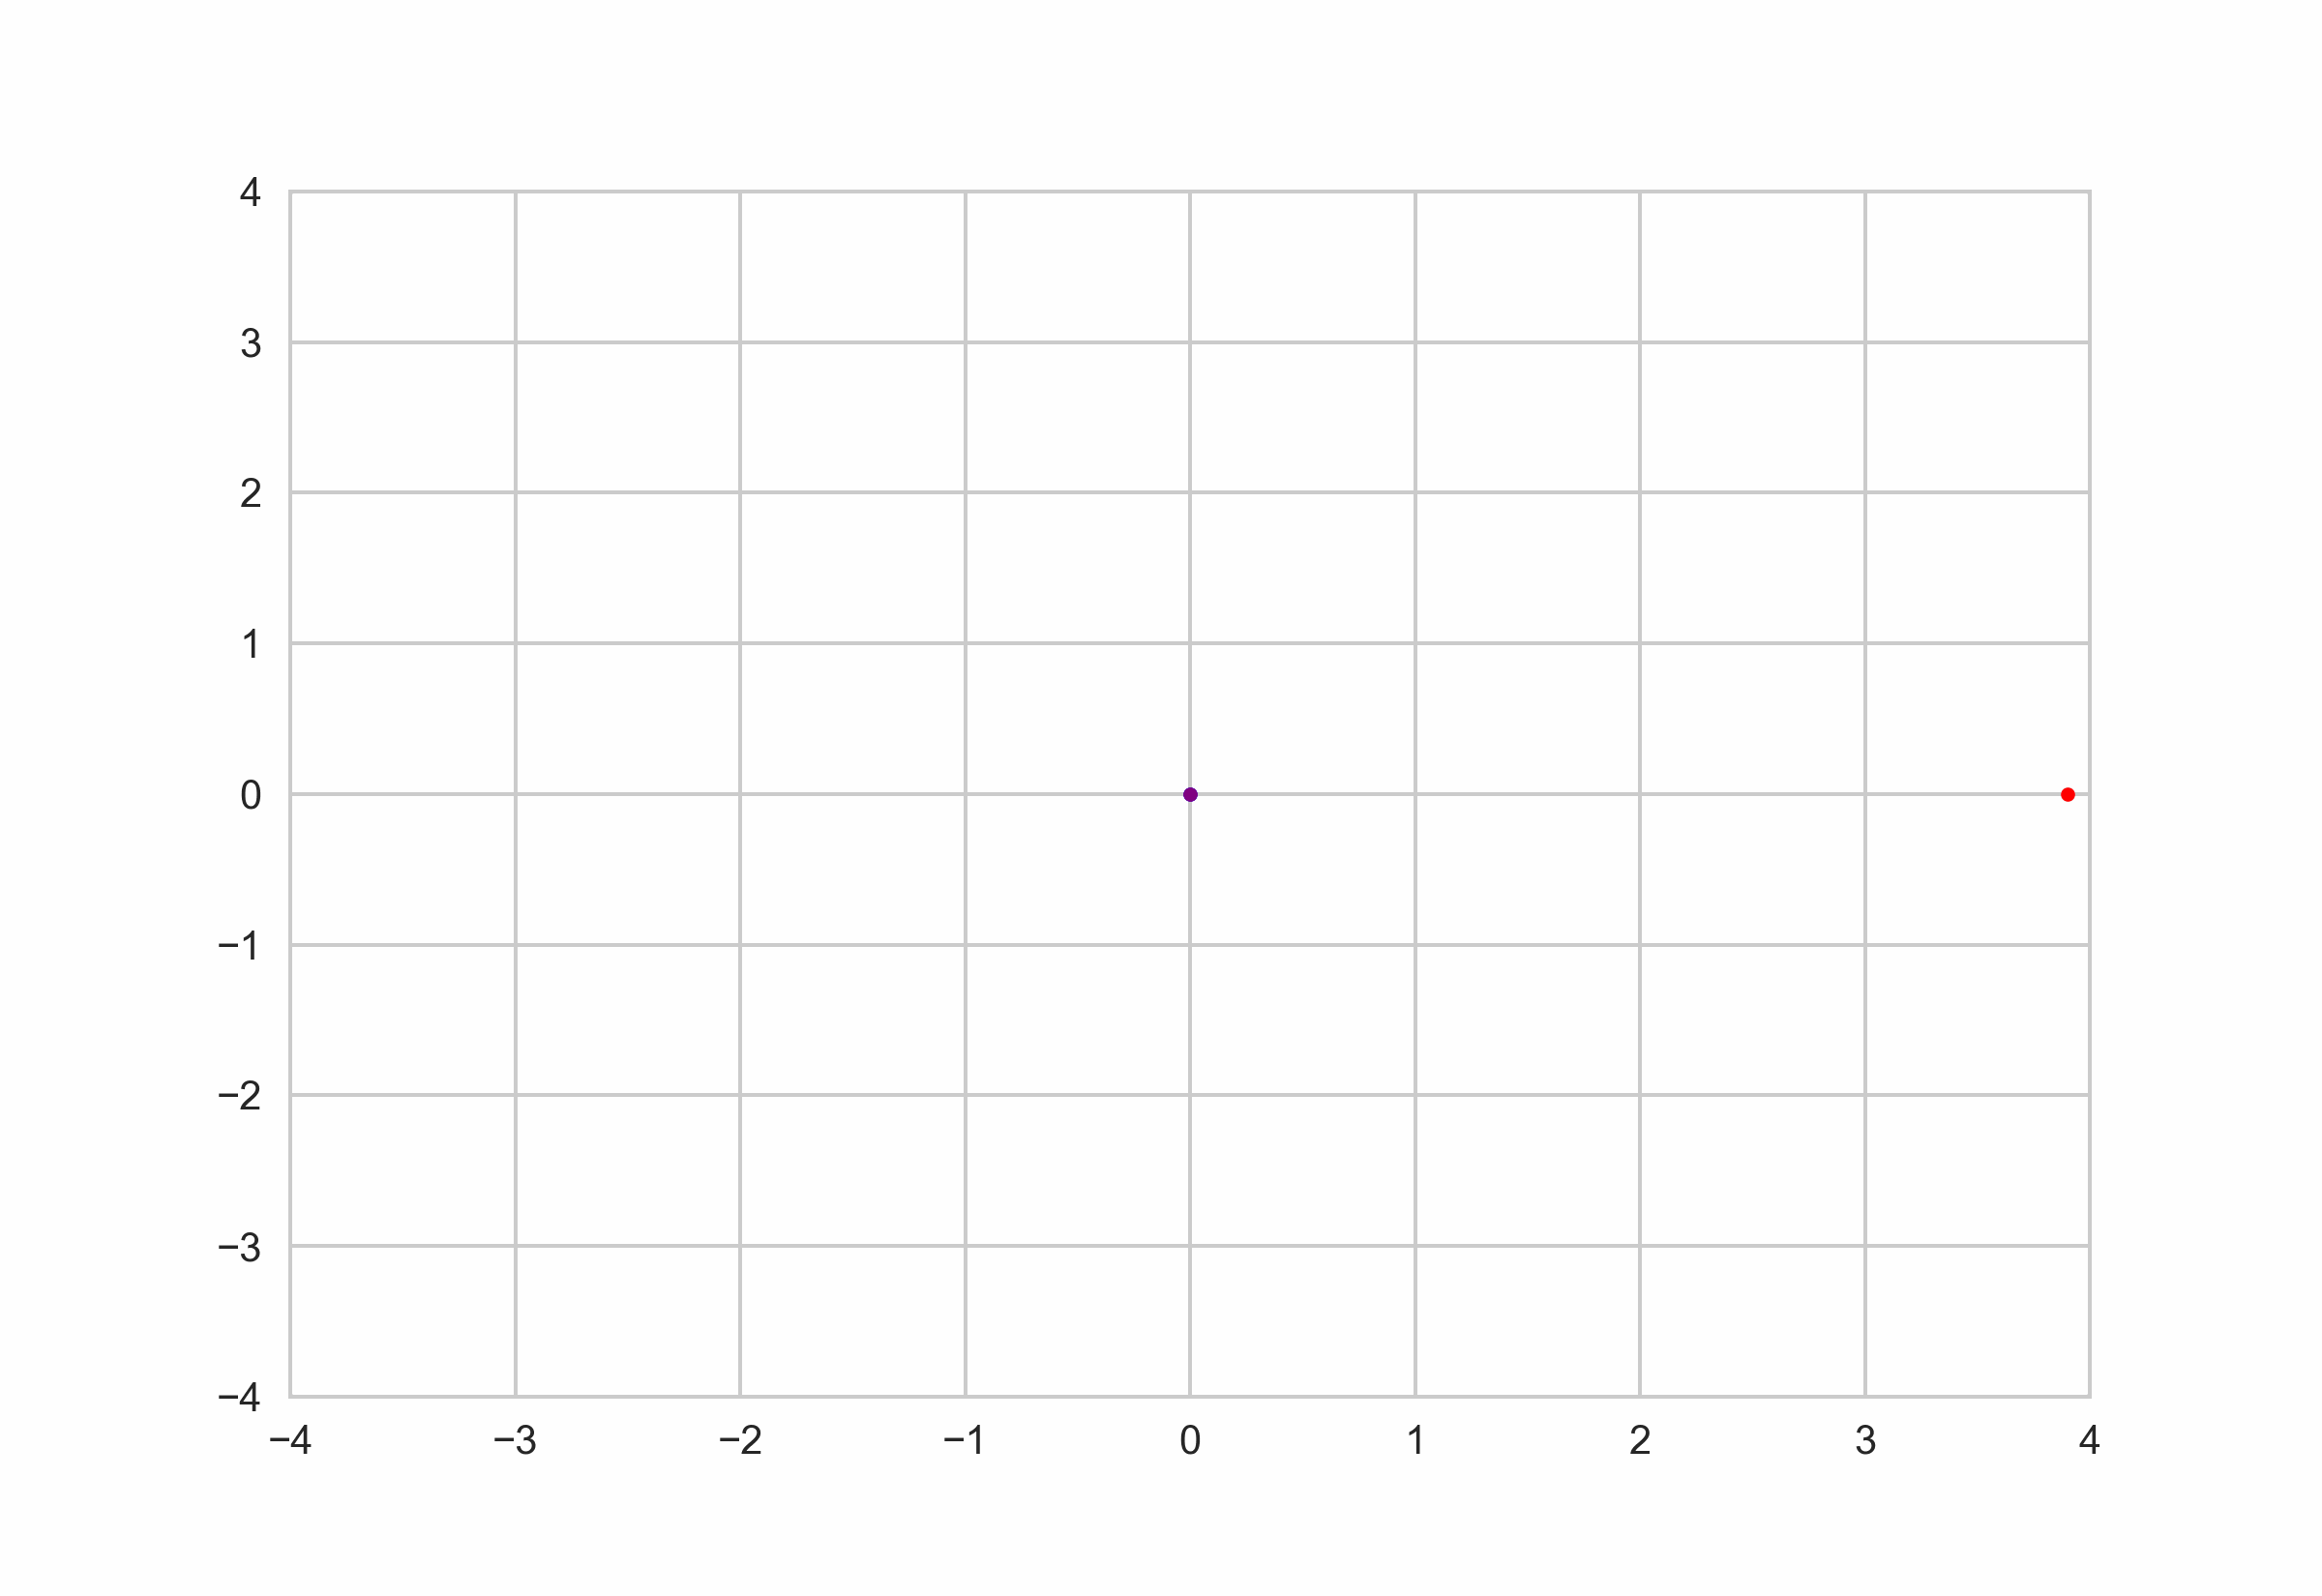

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

x1 = np.arange(0, -0.2, -0.002)
y1 = np.arange(0, -0.2, -0.002)
x2 = np.arange(3.9, 3.7, -0.002)
y2 = np.arange(0, 1, 0.01)
x3 = np.arange(0, 1.8, 0.018)
y3 = np.array(x3**2)

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    line, = ax.plot(x1[0:i], y1[0:i], color = 'blue', lw=1)
    line2, = ax.plot(x2[0:i], y2[0:i], color = 'red', lw=1)
    line3, = ax.plot(x3[0:i], y3[0:i], color = 'purple', lw=1)
    point1, = ax.plot(x1[i], y1[i], marker='.', color='blue')
    point2, = ax.plot(x2[i], y2[i], marker='.', color='red')
    point3, = ax.plot(x3[i], y3[i], marker='.', color='purple')
    return line, line2, line3, point1, point2, point3,
        
ani = FuncAnimation(fig, animate, interval=40, blit=True, repeat=True, frames=100)    
ani.save("TLI.gif", dpi=300, writer=PillowWriter(fps=25))

plt.close(fig)

# from IPython.display import Image
Image('TLI.gif', width=500)